# Visualize PSNR

### 주어진 입력 이미지에 대하여 128 픽셀 단위로 슬라이딩하며,
### 256 x 256 크기로 크롭한 sub-images (160,200개) 의 PSNR 분포를 분석한다.

In [96]:
%matplotlib inline
import os
import numpy as np
import seaborn as sns
import random
import pandas as pd
import matplotlib.pyplot as plt
import cv2

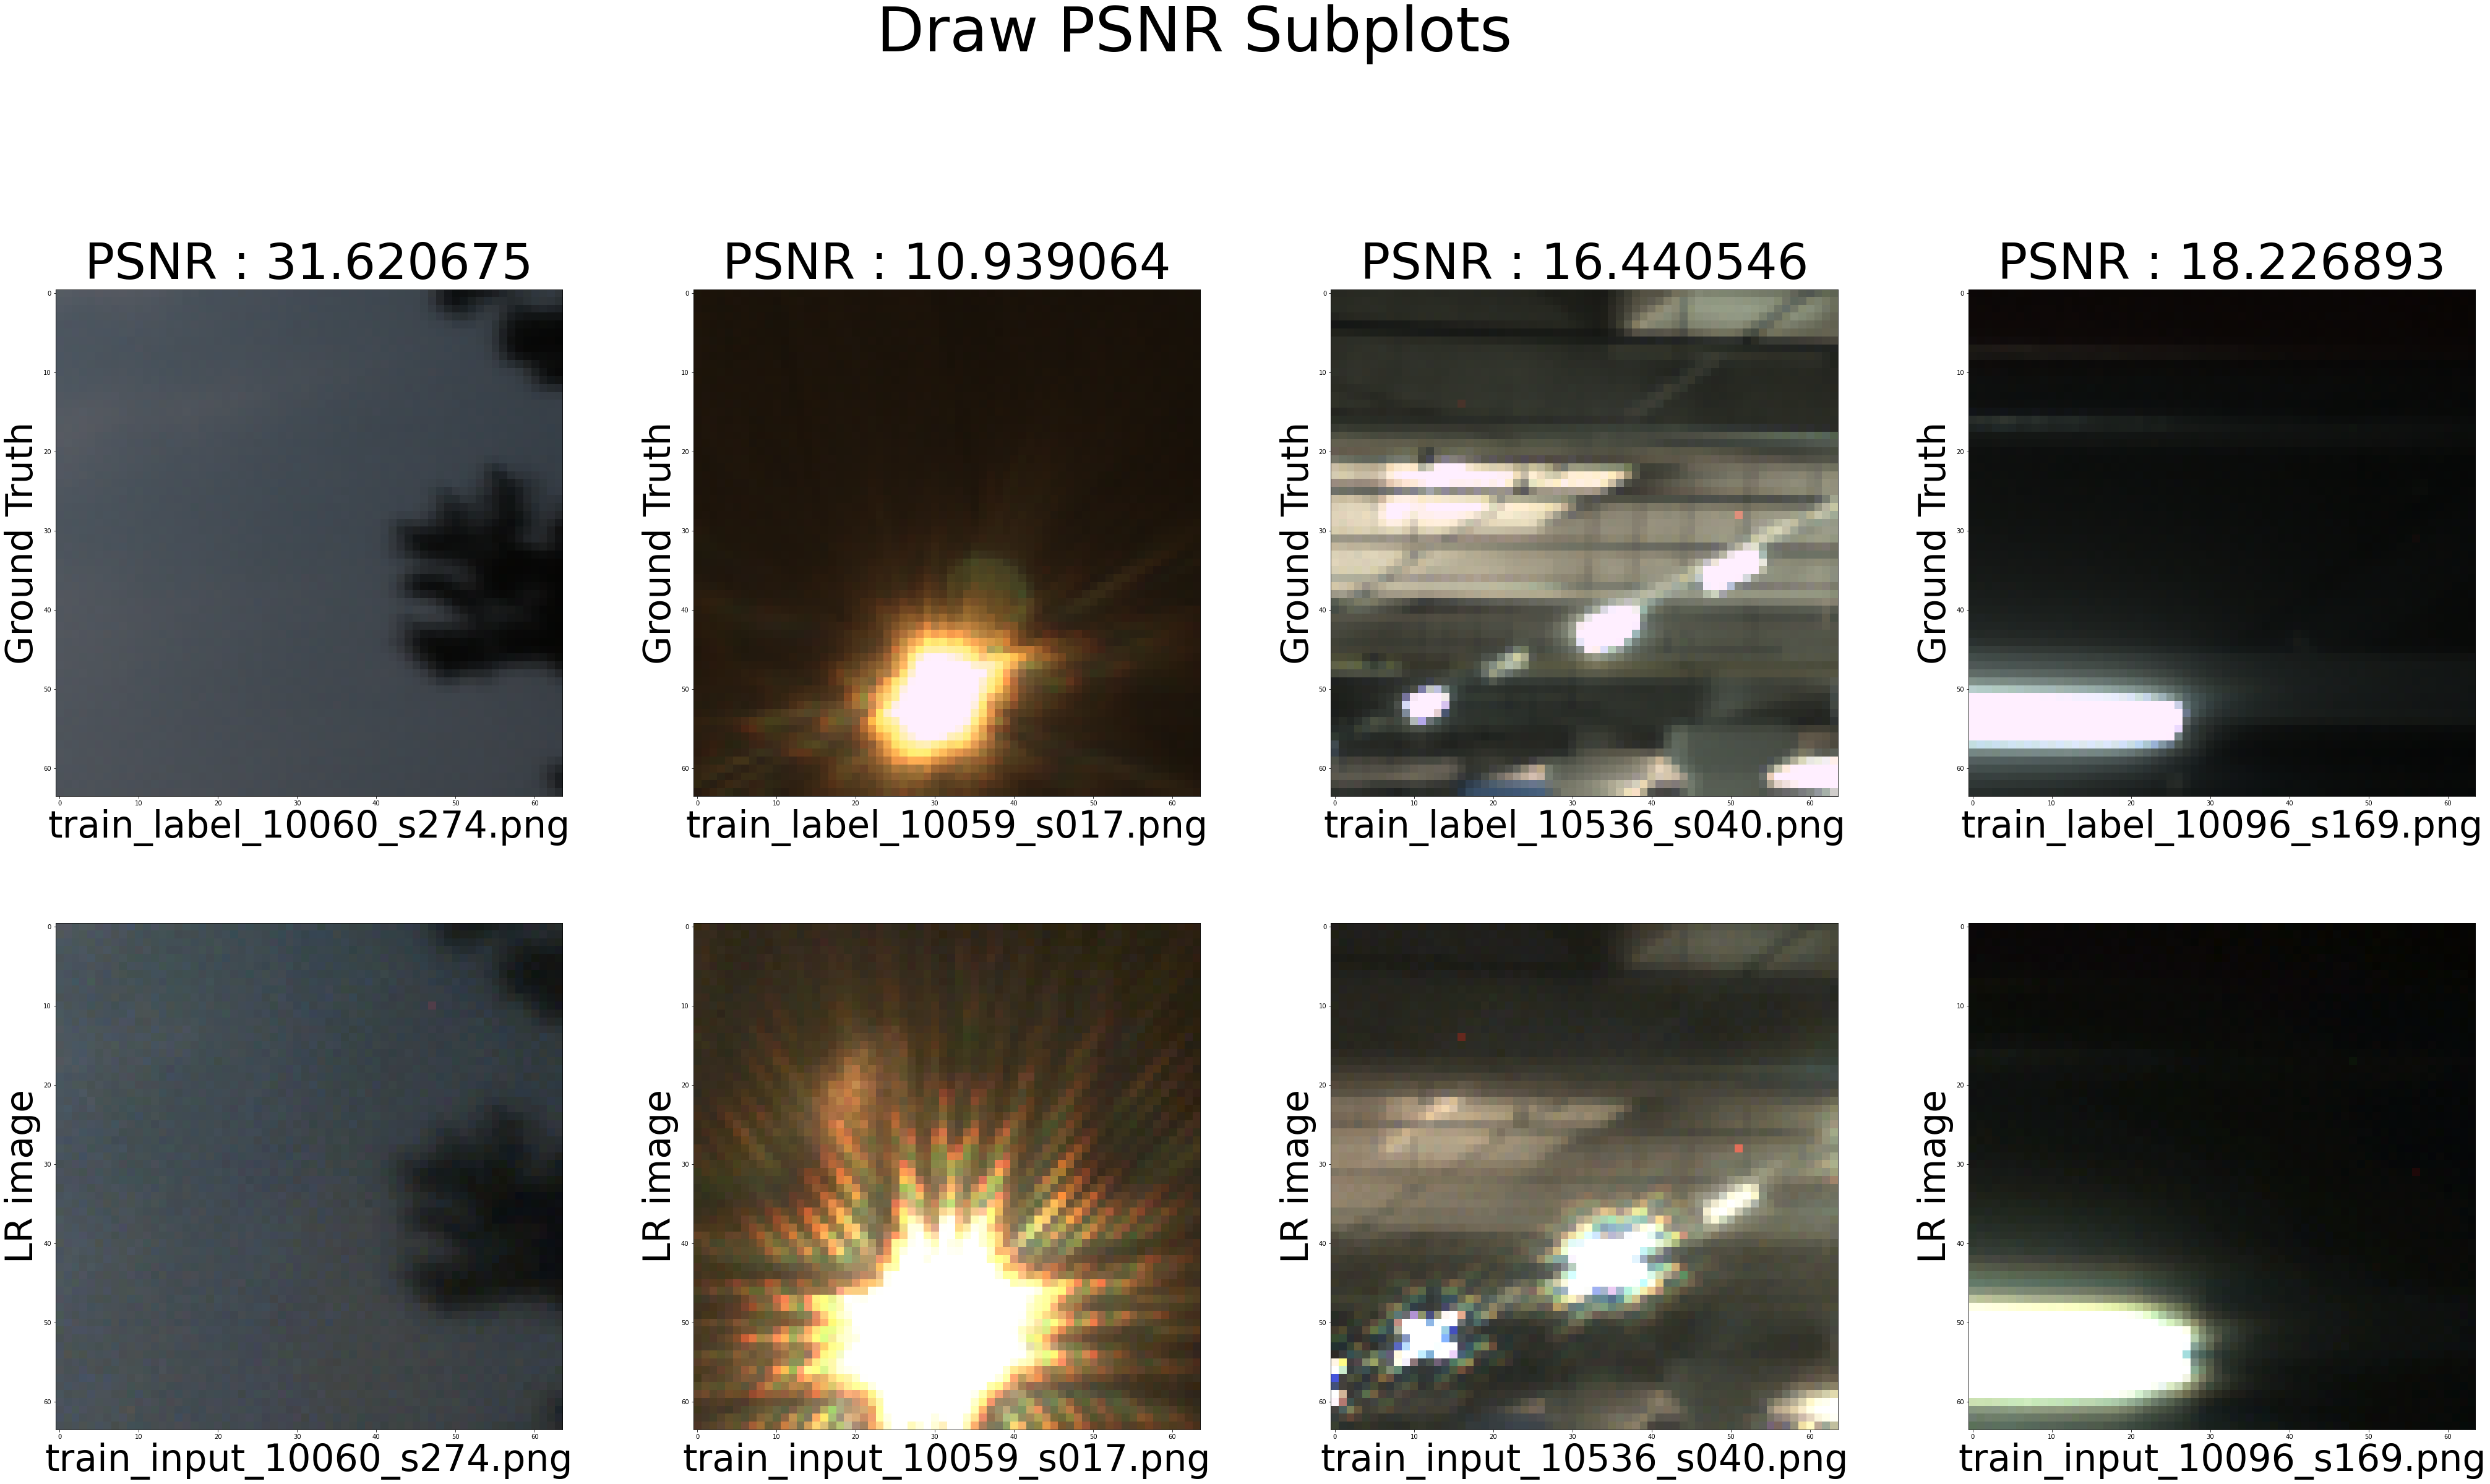

In [97]:
def random_img_choice(path, num=4):
    txt = open(txt_path,'r')
    lines = txt.readlines()
    
    results = random.choices(lines, k=num)
    
    names_list = []
    psnr_list = []
    for result in results:
        name = result.split(",")[0]
        psnr = float(result.split(" : ")[1])
        names_list.append(name)
        psnr_list.append(psnr)
        
    return names_list, psnr_list


def draw_psnr_subplot(path, img_path,num):
    
    names_list, psnr_list = random_img_choice(path, num)
    
    
    fig, ax = plt.subplots(2, 4, figsize=(40,10))
    ax[0][1].figure.set_size_inches(64,64)
    fig.subplots_adjust(left=0.1,right=0.95,bottom=0.3,top=0.7,wspace=0.25,hspace=0.25)
    fig.suptitle('Draw PSNR Subplots', fontsize=100, y=0.8)
    
    for idx, name in enumerate(names_list):
        new_name = name.split("_")[0] + "_input_" + name.split("_")[2] + "_" + name.split("_")[3]

        GT_path = os.path.join(img_path, "train_GT_sub_img/", name)
        LR_path = os.path.join(img_path, "train_LR_sub_img/", new_name)
        
        GT = cv2.imread(GT_path)
        LR = cv2.imread(LR_path)
        
        a = cv2.cvtColor(GT, cv2.COLOR_BGR2RGB)
        a = cv2.resize(a, dsize=(64, 64))
        
        b = cv2.cvtColor(LR, cv2.COLOR_BGR2RGB)
        b = cv2.resize(b, dsize=(64, 64))

        ax[0][idx].imshow(a)
        ax[1][idx].imshow(b)
        
        ax[0][idx].set_xlabel(name, fontsize = 60)
        ax[0][idx].set_ylabel('Ground Truth', fontsize = 60)
        ax[0][idx].set_title("PSNR : " + str(psnr_list[idx]), fontsize = 80)

        ax[1][idx].set_xlabel(new_name, fontsize = 60)
        ax[1][idx].set_ylabel('LR image', fontsize = 60)

    plt.rcParams["figure.figsize"] = (64, 64)
    plt.show()

txt_path = "./PSNR_logs.txt"
img_path = "./datasets/"
draw_psnr_subplot(txt_path, img_path, 4)

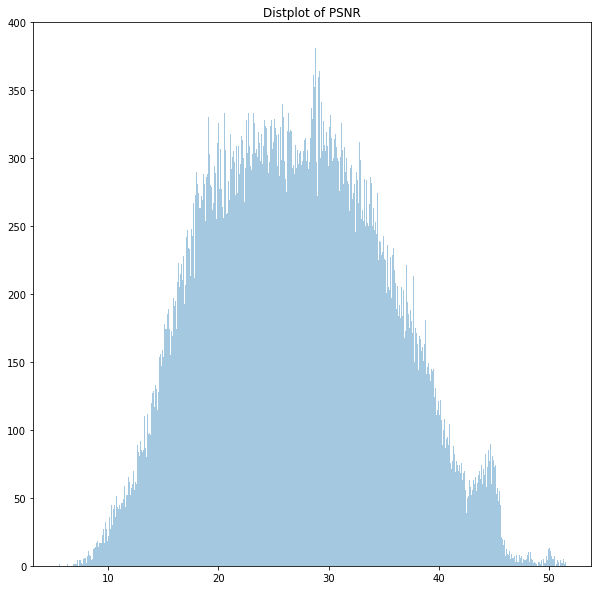

In [101]:
path = "./PSNR_logs.txt"
write_path = "./PSNR_only.csv"
f = open(path,'r')
csv = open(write_path,'w')

psnr_list = []
lines = f.readlines()
for line in lines:
    psnr = float(line.split(" : ")[1])
    psnr_list.append(psnr)
    new_line = str(psnr) + "\n"
    csv.write(new_line)
f.close()
csv.close()

hist = sns.distplot(psnr_list, bins=1000, kde=False)
hist.figure.set_figwidth(10)
hist.figure.set_figheight(10)

plt.title("Distplot of PSNR")
plt.show()

In [102]:
pd_psnr = pd.Series(psnr_list)
pd_psnr.describe()

count    160200.000000
mean         27.107643
std           8.068736
min           5.495331
25%          20.809031
50%          26.884027
75%          32.972153
max          51.555578
dtype: float64

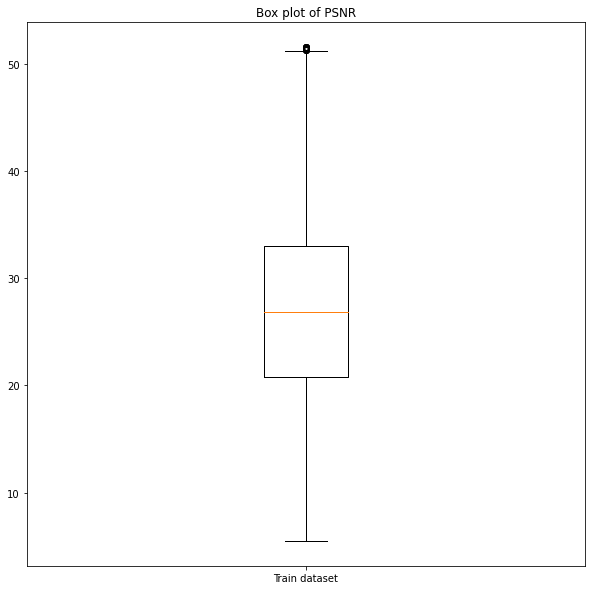

In [109]:
plt.figure(figsize=(10, 10))
plt.boxplot(pd_psnr)

plt.title('Box plot of PSNR')
plt.xticks([1], ['Train dataset'])
plt.show()